In [1]:
# NITI SINGH
# 2011101
# MID SEM EXAM


import NSLib2 as l
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# QUESTION 1


def f(q):
    return (math.log(0.5*q) - math.sin((5*q)/2))
def df(q):
    return (1/q) -((5/2)*math.cos(5*q/2))
a=1.5
b=2.5
tol = 1e-6
x=1 #Initial guess

#l.regulaFalsi(f,a,b,tol)
#A,B=l.bracket(f,a,b)
#l.newtonRaphson(f,df,x,tol)

#print(N,R)
print('Comparing Regula falsi vs Newton raphson')
print()
n,cn=l.newtonRaphson(f,df,x,tol)
print()
print('Root from Newton raphson: ',n, ' in ',cn, 'iterations')
print()
r,cr=l.regulaFalsi(f,a,b,tol)
print('Root from Regula falsi: ',r, ' in ',cr, 'iterations')

Comparing Regula falsi vs Newton raphson

Root for newton raphson:  1.430129855562949
No. of iterations: 1
Root for newton raphson:  1.4015296332411356
No. of iterations: 2
Root for newton raphson:  1.401929860043998
No. of iterations: 3
Root for newton raphson:  1.4019299316146105
No. of iterations: 4

Root from Newton raphson:  1.4019299316146105  in  4 iterations

Root for Regula falsi 1.42471597972934
1  :  1.42471597972934
Root for Regula falsi 1.4019504982536213
2  :  1.4019504982536213
Root for Regula falsi 1.4019299493010131
3  :  1.4019299493010131
Root for Regula falsi 1.4019299316298217
4  :  1.4019299316298217
Root from Regula falsi:  1.4019299316298217  in  4 iterations


For temperature = 100 +- 0.1 degree C is:

At  4.41999999999995 m:  99.92177871123582 degree C
At  4.42999999999995 m:  100.07045334089227 degree C



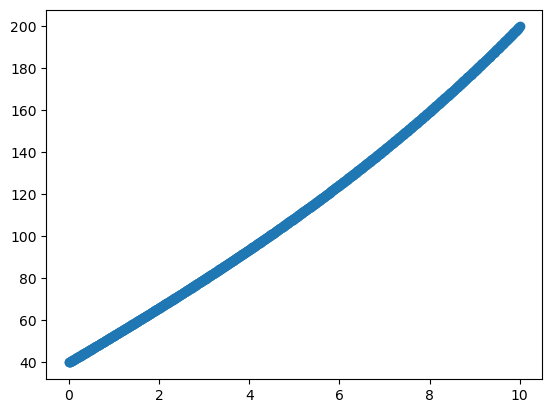

In [3]:
# Question 2
#shoot(d2ydx2, dydx, x0, y0, xf, yf, z_g1, z_g2, st, tol)

a = 0.01
def dydx(x, y, z):
    return z
def d2ydx2(x, y, z):
    return -(a*(20-y))

x_1, y_1, z_1 = l.shoot(d2ydx2, dydx, 0, 40, 10, 200, 0, 1000, 0.01, 0.000001)

#finding closest temp to 100 in the rod
print('For temperature = 100 +- 0.1 degree C is:\n')
for i in range(0,len(x_1)):
    v=(y_1[i] - 100)
    if abs(v) <= 0.1:
        print('At ', x_1[i],'m: ',y_1[i], 'degree C')
print()
plt.scatter(x_1,y_1) #blue

Alpha =  0.19999999999999996



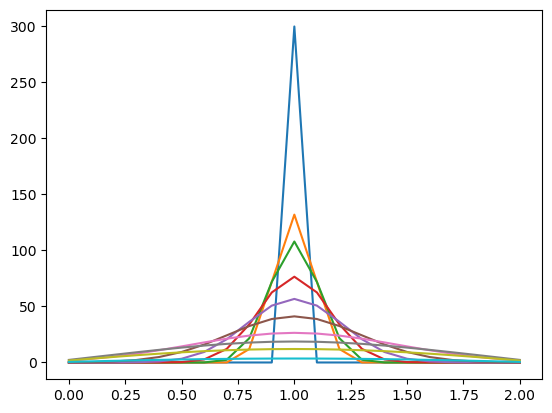

In [4]:
# Question 3

def vnot(l_x, N_x): 
    V0 = []
    X = []
    h_x = (l_x/N_x)
    for i in range(0,N_x+1):
        # print(i)
        if h_x*i == 1:
            V0.append(300)
        else:
            V0.append(0)
        X.append(i*h_x)
    # print(V0)
    # print(0)
    plt.plot(X, V0) 
    return X, V0
# at time stamp = 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000:
lx = 2         #length of rod
lt = 10       #time to observe
nx = 20       #no of length intervals
nt = 5000   #no of time intervals
l.pde(vnot,lx,lt,nx,nt)

In [5]:
#Question 4

#lambda(x) = x^2 ; C = ~xdm/~dm ; dm = lambda dx = x^2dx

def dm(x):
    return x**2
def xdm(x):
    return x**3

#limit = [0,2]

#Using simpsons method to solve the linear mass density integral

a = l.Simpsons(dm,0,2,10)
b = l.Simpsons(xdm,0,2,10)
#print(a,b)
C = b/a # Calculating centre of mass
print (f'The center of mass of the rod is {C:.4f}')

The center of mass of the rod is 1.5000


In [6]:
# QUESTION 5

with open('a5.txt', 'r') as f1:
    a = [[float(num) for num in line.split(',')] for line in f1 ]
print (a)
print()
b1 = open('b5.txt', 'r')
b= b1.read().split(',')
for i in range(0,len(b)):
    b[i]=float(b[i])
print(b)
    
#finding the L and U using library function
L1,U1=l.lud(a)

#forward subsitutuion
y=l.forwardsub(L1,b)
print('After forward subsitution, Matrix is: \n', y)


#backward subsitution
z=l.backwardsub(U1,y)
print('After backward subsitution, the answer matrix is: \n',z)

[[1.0, -1.0, 4.0, 0.0, 2.0, 9.0], [0.0, 5.0, -2.0, 7.0, 8.0, 4.0], [1.0, 0.0, 5.0, 7.0, 3.0, -2.0], [6.0, -1.0, 2.0, 3.0, 0.0, 8.0], [-4.0, 2.0, 0.0, 5.0, -5.0, 3.0], [0.0, 7.0, -1.0, 5.0, 4.0, -2.0]]

[19.0, 2.0, 13.0, -7.0, -9.0, 2.0]

Lower triangle:
[[1, 0, 0, 0, 0, 0], [0.0, 1, 0, 0, 0, 0], [1.0, 0.2, 1, 0, 0, 0], [6.0, 1.0, -14.2857, 1, 0, 0], [-4.0, -0.4, 10.8571, -0.6974, 1, 0], [0.0, 1.4, 1.2857, -0.1579, 1.517, 1]]

Upper triangle:
[[1.0, -1.0, 4.0, 0.0, 2.0, 9.0], [0, 5.0, -2.0, 7.0, 8.0, 4.0], [0, 0, 1.4, 5.6, -0.6, -11.8], [0, 0, 0, 75.9999, -28.5714, -218.5713], [0, 0, 0, 0, -7.2114, 16.2822], [0, 0, 0, 0, 0, -51.6412]]

After forward subsitution, Matrix is: 
 [19.0, 2.0, -6.4, -214.4285, -12.257, -7.8359]

After backward subsitution, the answer matrix is: 
 [-1.7614, 0.8963, 4.052, -1.6174, 2.0422, 0.1517]
